In [1]:
from matplotlib.image import imread
import numpy as np
import cv2

from PIL import *

# 1.1 Task

In [2]:
def mse(a_image, b_image):
    
    # sum of square differenties btwn images pixel by pixel
    err = np.sum((a_image.astype("float") - b_image.astype("float")) ** 2)
    err /= float(a_image.shape[0] * b_image.shape[1]) # 

    return err

def ssim(imageX, imageY):
    def Covariance(x, y):
        xbar, ybar = x.mean(), y.mean()
        return ((x - xbar)*(y - ybar)).mean()
    
    ux = imageX.mean()
    uy = imageY.mean()
    sxy = Covariance(imageX, imageY)
    sx = imageX.std()
    sy = imageY.std()
    k1 = 0.01
    k2 = 0.03
    # --------bits   per    pixel----------
    byte_per_pixel = 1 if len(imageX.shape) == 2 else imageX.shape[2]
    L = 2 ** (byte_per_pixel * 8) - 1
    c1 = (k1*L)**2
    c2 = (k2*L)**2
    result = (2*ux*uy + c1)*(2*sxy+c2)/((ux**2+uy**2+c1)*(sx**2+sy**2+c2))
    
    return result

# 1.2 Task


<img src="grey.png" alt="Drawing" style="width: 200px;"/>
<img src="grey2.png" alt="Drawing" style="width: 200px;"/>

In [3]:
logo_orig_path = r"grey.png"
logo_filter_path = r"grey2.png"
image_orig = imread(logo_orig_path)
image_filter = imread(logo_filter_path)

print("Mean Squared Error, original images", mse(image_orig, image_orig))
print("Mean Squared Error, diff images", mse(image_orig, image_filter))
print("Structural similarity, orig images", ssim(image_orig, image_orig))
print("Structural similarity, diff images", ssim(image_orig, image_filter))

Mean Squared Error, original images 0.0
Mean Squared Error, diff images 0.008919923740035071
Structural similarity, orig images 0.9999999999682094
Structural similarity, diff images 0.9998478039504294


# Task 2

In [4]:
from skimage import measure
from matplotlib.image import imread
import matplotlib.pyplot as plt


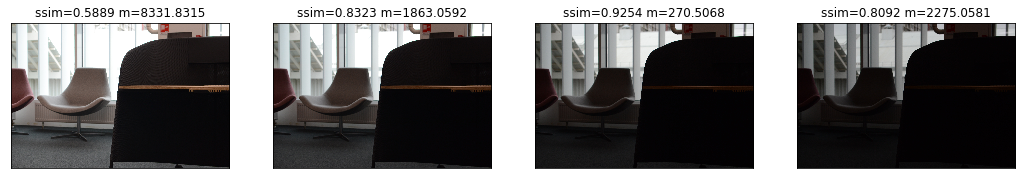

In [5]:
import os


reference = imread(r"d:\Jupyter\Skoltech\CI\photos task2\reference ci_1_task2_exp_1-160_F3,5.JPG")
over1 = imread(r"d:\Jupyter\Skoltech\CI\photos task2\over 1 ci_1_task2_exp_1-30_F3,5.JPG")
over2 = imread(r"d:\Jupyter\Skoltech\CI\photos task2\over 2 ci_1_task2_exp_1-60_F3,5.JPG")
under1 = imread(r"d:\Jupyter\Skoltech\CI\photos task2\under ci_1_task2_exp_1-200_F3,5.JPG")
under2 = imread(r"d:\Jupyter\Skoltech\CI\photos task2\under ci_1_task2_exp_1-320_F3,5.JPG")


images = [over1, over2, under1, under2]
images_name  = ["over1", "over2", "under1", "under2"]
    

ssims = list()
meses = list()
fig, ax = plt.subplots(nrows=1, ncols=len(images))
fig.set_figheight(6)
fig.set_figwidth(18)
for index, (img, axes) in enumerate(zip(images, ax)):
    axes.imshow(img)
    axes.set_xticks(())
    axes.set_yticks(())
    ssim = measure.compare_ssim(reference, img, multichannel=True)   
    ssims.append(ssim)
    m = mse(reference, img)
    meses.append(m)
    ssim = "{:.4f}".format(ssim)
    m = "{:.4f}".format(m)
    axes.set_title("ssim=" + ssim + " " + "m=" + m)
plt.show()

# How does the change in brightness in an image affect the MSE and the SSIM scores?

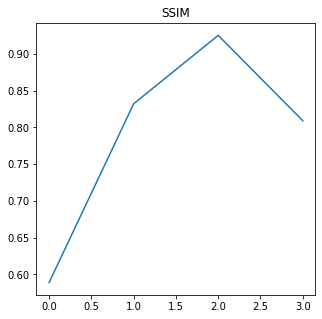

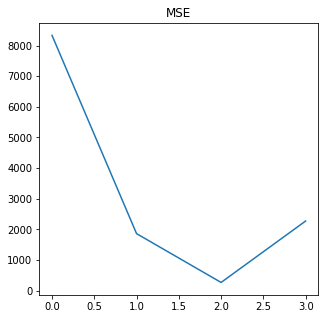

In [394]:
plt.figure(figsize = (5,5))
plt.plot(range(4), ssims)
plt.title("SSIM")
plt.show()
plt.figure(figsize = (5,5))
plt.plot(range(4), meses)
plt.title("MSE")
plt.show()

### The brighter (or darker) the image, the lower the structural similarity and the higher the MSE. By losing the structure in the object, we get a lower SSIM and a higher MSE.

# sine pattern

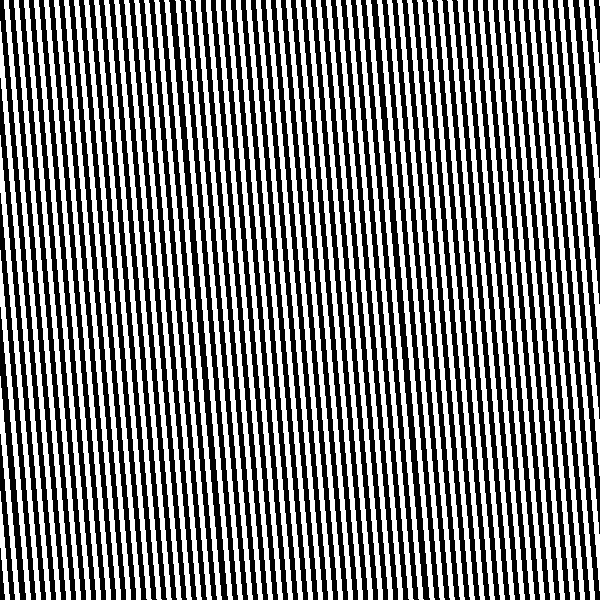

In [304]:
def generate_stripes(theta, delta):
    image  = np.zeros((1000,1000), np.uint8)
    ranges = np.linspace(0, image.shape[0], image.shape[0]//delta, dtype=int)
    for i in range(0, len(ranges)-1, 2):
        image[:, ranges[i]:ranges[i+1]] = 255
    
    pad = 300
    image = np.pad(image, 100, mode='constant')
    image = np.array( Image.fromarray(image).rotate(theta))
    image = image[pad:-pad, pad:-pad]
    return image

Image.fromarray(generate_stripes(5, 5))

# object and sin patterns


# delete strips

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


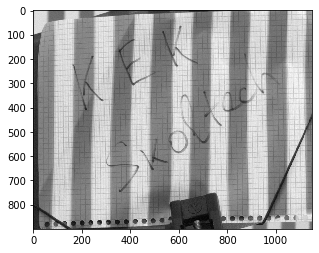

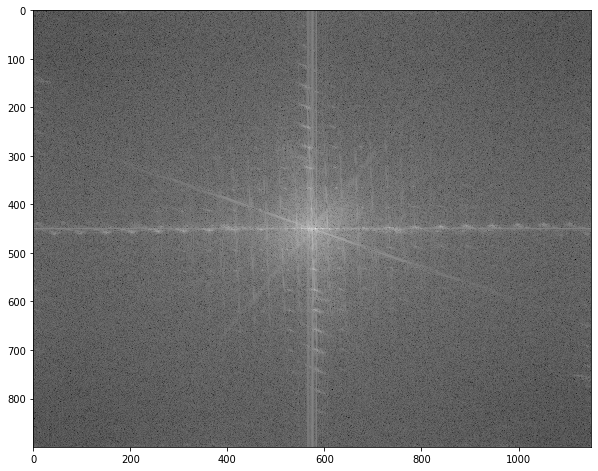

In [233]:
!pip install rawpy

raw = rawpy.imread('fourier dataset/0_10.NEF')
rgb = raw.postprocess()
rgb = rgb[700:1600, 2750:3900]
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (5,5))
plt.imshow(gray , cmap='gray')  # transfrom to gray field
plt.show()

fft = np.fft.fftshift(np.fft.fft2(gray)) # fourier transform

plt.figure(figsize = (10,10))
enhanced = np.log( np.abs(fft)).astype(float) #enhance garmonics
plt.imshow(enhanced , cmap='gray')

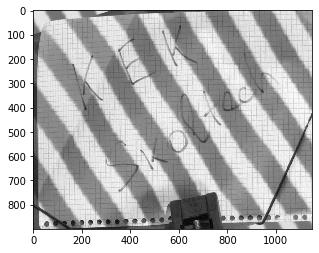

d:\jupyter\venv\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


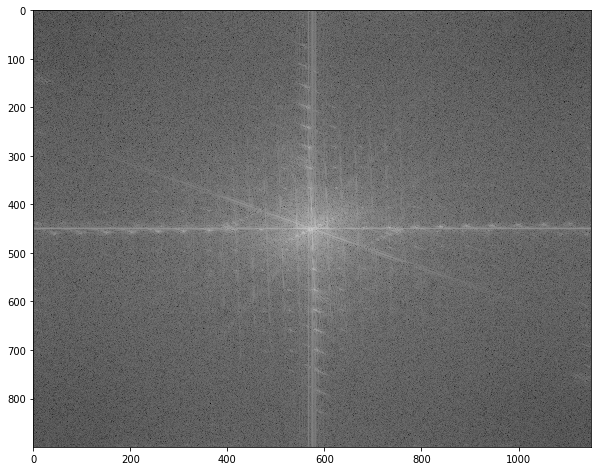

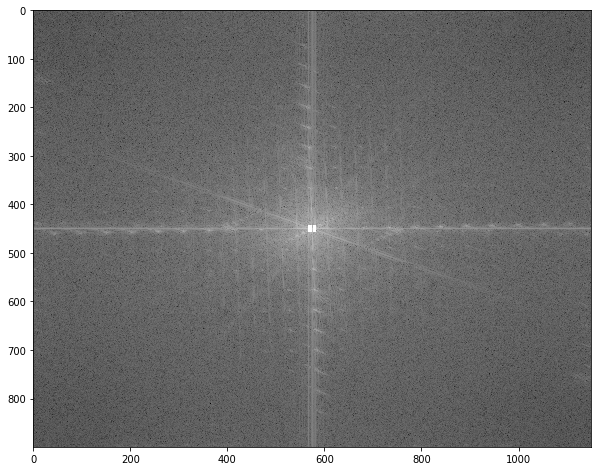

In [302]:
raw = rawpy.imread('fourier dataset/30_10.NEF')
rgb = raw.postprocess()
rgb = rgb[700:1600, 2750:3900]
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (5,5))
plt.imshow(gray , cmap='gray')  # transfrom to gray field
plt.show()

fft = np.fft.fftshift(np.fft.fft2(gray)) # fourier transform
plt.figure(figsize = (10,10))
enhanced = np.log( np.abs(fft)).astype(float) #enhance garmonics
plt.imshow(enhanced , cmap='gray')

pad = 8

x_cut = fft.shape[0]//2 - pad, fft.shape[0]//2 + pad
y_cut = fft.shape[1]//2 - pad, fft.shape[1]//2
chunk = fft[x_cut[0]:x_cut[1], y_cut[0]:y_cut[1]]


fft[x_cut[0]:x_cut[1], y_cut[0]:y_cut[1]] = 0

x_cut = fft.shape[0]//2 - pad, fft.shape[0]//2 + pad
y_cut = fft.shape[1]//2+2, fft.shape[1]//2 + pad
chunk = fft[x_cut[0]:x_cut[1], y_cut[0]:y_cut[1]]
fft[x_cut[0]:x_cut[1], y_cut[0]:y_cut[1]] = 0

plt.figure(figsize = (10,10))
enhanced = np.log(np.abs(fft)).astype(float) #enhance garmonics
plt.imshow(enhanced , cmap='gray')


# Image w/o strips (kind of)

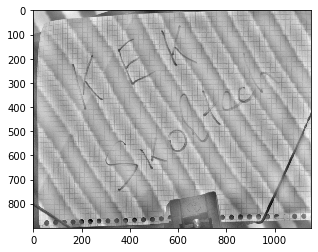

In [303]:
fourier = np.fft.ifft2(np.fft.ifftshift(fft))
plt.imshow(np.real(fourier), cmap = 'gray')

# 4 task

In [328]:
reference = imread(r"4 task\depth_reference.jpg")
reference = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)

near = imread(r"4 task\depth_near.jpg")
near = cv2.cvtColor(near, cv2.COLOR_BGR2GRAY)


middle = imread(r"4 task\depth_middle.jpg")
middle = cv2.cvtColor(middle, cv2.COLOR_BGR2GRAY)

far = imread(r"4 task\depth_far.jpg")
far = cv2.cvtColor(far, cv2.COLOR_BGR2GRAY)

print("Structural similarity, orig image and near", measure.compare_ssim(reference, near, multichannel=True))
print("Structural similarity, orig image and middle", measure.compare_ssim(reference, middle, multichannel=True))
print("Structural similarity, orig image and far", measure.compare_ssim(reference, far, multichannel=True))

print("Mean Squared Error, orig image and near", mse(reference, near))
print("Mean Squared Error, orig image and middle", mse(reference, middle))
print("Mean Squared Error, orig image and far", mse(reference, far))


Structural similarity, orig image and near 0.8653733066480573
Structural similarity, orig image and middle 0.8169687324859686
Structural similarity, orig image and far 0.7240651144618646
Mean Squared Error, orig image and near 225.40230100484007
Mean Squared Error, orig image and middle 301.4498860328347
Mean Squared Error, orig image and far 432.440069193354


# sharp by convolution

Structural similarity, orig image and sharp near 0.6294564579529989
Mean Squared Error, orig image and sharp near 259.8884622344021


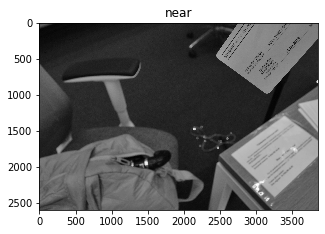

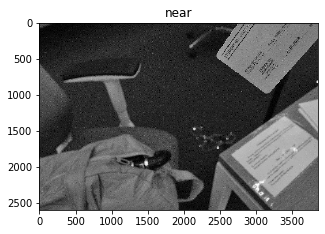

In [390]:
zero = np.zeros((3,3))
zero[1,1] = 2
ones = np.ones((3,3))
ones[1,1] = -9
kernel = zero + ones*1.01

plt.figure(figsize = (5,5))
plt.title("near")
plt.imshow(near , cmap='gray')
axes.imshow(img)
near_sharp = cv2.filter2D(near, -1, kernel)
plt.figure(figsize = (5,5))
plt.title("near")
plt.imshow(near_sharp , cmap='gray')
axes.imshow(img)
print("Structural similarity, orig image and sharp near", measure.compare_ssim(reference, near_sharp, multichannel=True))
print("Mean Squared Error, orig image and sharp near", mse(reference, near_sharp))

Structural similarity, orig image and sharp near 0.5827850737220751
Mean Squared Error, orig image and sharp near 417.64590148645544


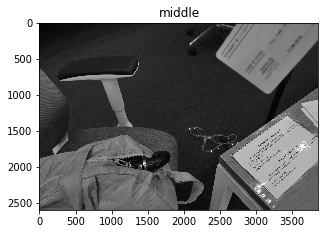

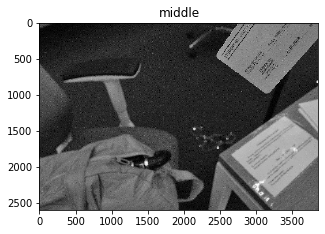

In [391]:
zero = np.zeros((3,3))
zero[1,1] = 2
ones = np.ones((3,3))
ones[1,1] = -9
kernel = zero + ones*0.98
plt.figure(figsize = (5,5))
plt.title("middle")
plt.imshow(middle , cmap='gray')
axes.imshow(img)
middle_sharp = cv2.filter2D(middle, -1, kernel)
plt.figure(figsize = (5,5))
plt.title("middle")
plt.imshow(near_sharp , cmap='gray')
axes.imshow(img)
print("Structural similarity, orig image and sharp near", measure.compare_ssim(reference, middle_sharp, multichannel=True))
print("Mean Squared Error, orig image and sharp near", mse(reference, middle_sharp))

Structural similarity, orig image and sharp near 0.47276928051395006
Mean Squared Error, orig image and sharp near 570.6350132280826


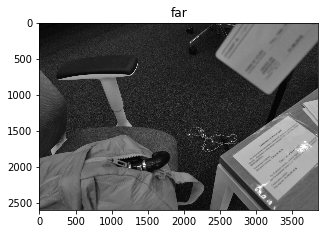

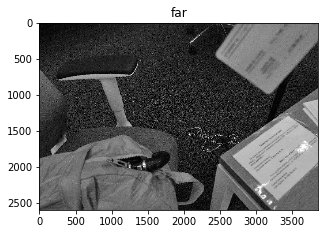

In [392]:
zero = np.zeros((3,3))
zero[1,1] = 2
ones = np.ones((3,3))
ones[1,1] = -9
kernel = zero + ones*0.98
plt.figure(figsize = (5,5))
plt.title("far")
plt.imshow(far , cmap='gray')
axes.imshow(img)
far_sharp = cv2.filter2D(far, -1, kernel)
plt.figure(figsize = (5,5))
plt.title("far")
plt.imshow(far_sharp , cmap='gray')
axes.imshow(img)
print("Structural similarity, orig image and sharp near", measure.compare_ssim(reference, far_sharp, multichannel=True))
print("Mean Squared Error, orig image and sharp near", mse(reference, far_sharp))